this soulation comes from this link:
https://www.kaggle.com/code/harinuu/store-sales-competition

# Imports 

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 


# read the data 

In [3]:
dataset=pd.read_csv('./train.csv', index_col='date', parse_dates=True).drop(columns='id')
dataset

,store_nbr,family,sales,onpromotion
date,,,,
2013-01-01,1,AUTOMOTIVE,0.000,0
2013-01-01,1,BABY CARE,0.000,0
2013-01-01,1,BEAUTY,0.000,0
2013-01-01,1,BEVERAGES,0.000,0
2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...
2017-08-15,9,POULTRY,438.133,0
2017-08-15,9,PREPARED FOODS,154.553,1
2017-08-15,9,PRODUCE,2419.729,148


In [4]:
dataset.family.value_counts().shape

(33,)

we have 33 product families lets change family to columns 

In [5]:
dataset = pd.get_dummies(dataset, columns=['family'])

In [6]:
print(dataset.store_nbr.value_counts().shape)


(54,)


we have 54 stores 

In [7]:
dataset.index.value_counts().shape

(1684,)

In [8]:
pd.date_range(start='2013-01-01', end='2017-08-15').difference(dataset.index)

DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)

we have 1684 date and we only chrismas days from these timeseries 

In [9]:
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_MAGAZINES,family_MEATS,family_PERSONAL CARE,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0.000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0.000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0.000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0.000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-01-01,1,0.000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,438.133,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2017-08-15,9,154.553,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2017-08-15,9,2419.729,148,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
store = pd.read_csv('./stores.csv', index_col='store_nbr')
store

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [11]:
holiday= pd.read_csv('./holidays_events.csv', index_col='date', parse_dates=True)

In [12]:
oil=pd.read_csv('./oil.csv',index_col='date', parse_dates=True )
oil

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


In [13]:
transactions=pd.read_csv('./transactions.csv',index_col='date', parse_dates=True )

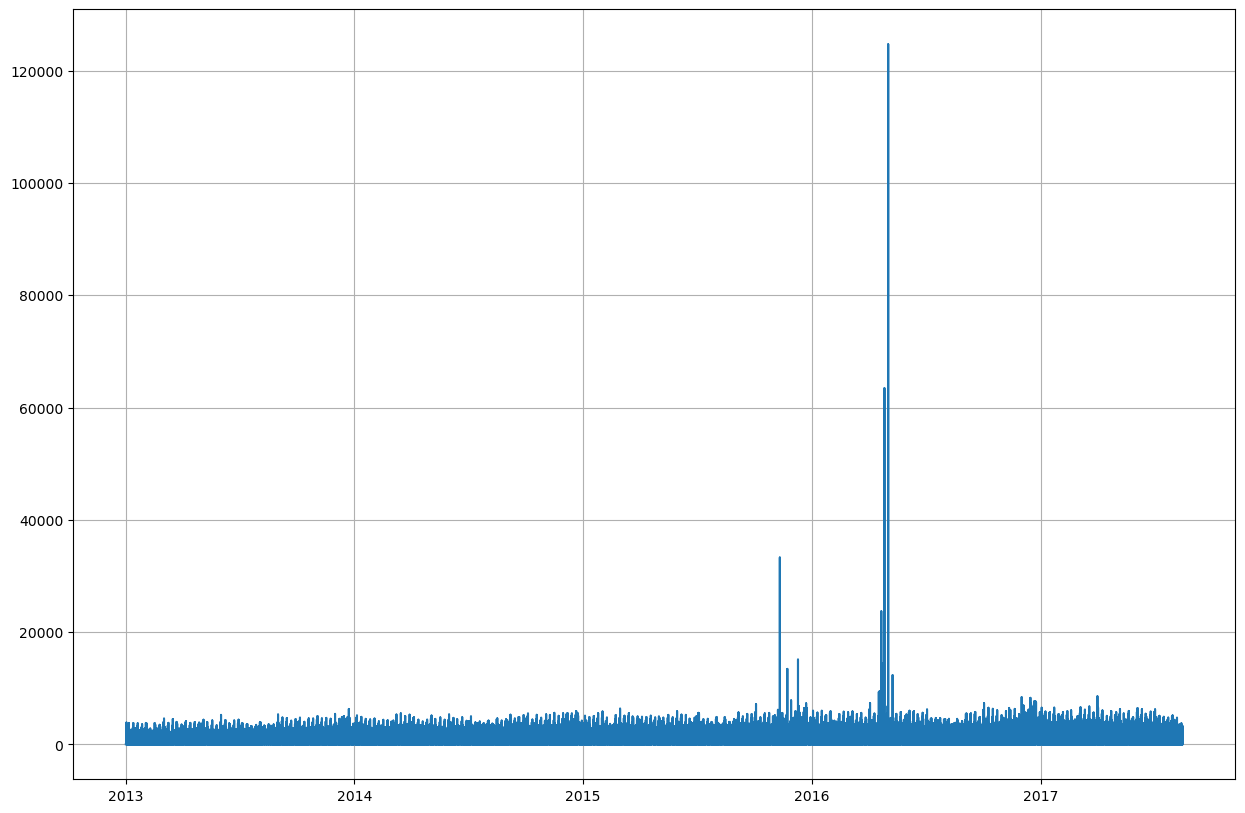

In [14]:
plt.figure(figsize=(15,10))
plt.plot(dataset[dataset.store_nbr==3].index, dataset[dataset.store_nbr==2].sales)
plt.grid()

In [15]:
dataset['month']= dataset.index.month
dataset['day']= dataset.index.day
dataset['year']= dataset.index.year
dataset


,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0.000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2013
2013-01-01,1,0.000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2013
2013-01-01,1,0.000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2013
2013-01-01,1,0.000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,2013
2013-01-01,1,0.000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,438.133,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,8,15,2017
2017-08-15,9,154.553,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,8,15,2017
2017-08-15,9,2419.729,148,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8,15,2017


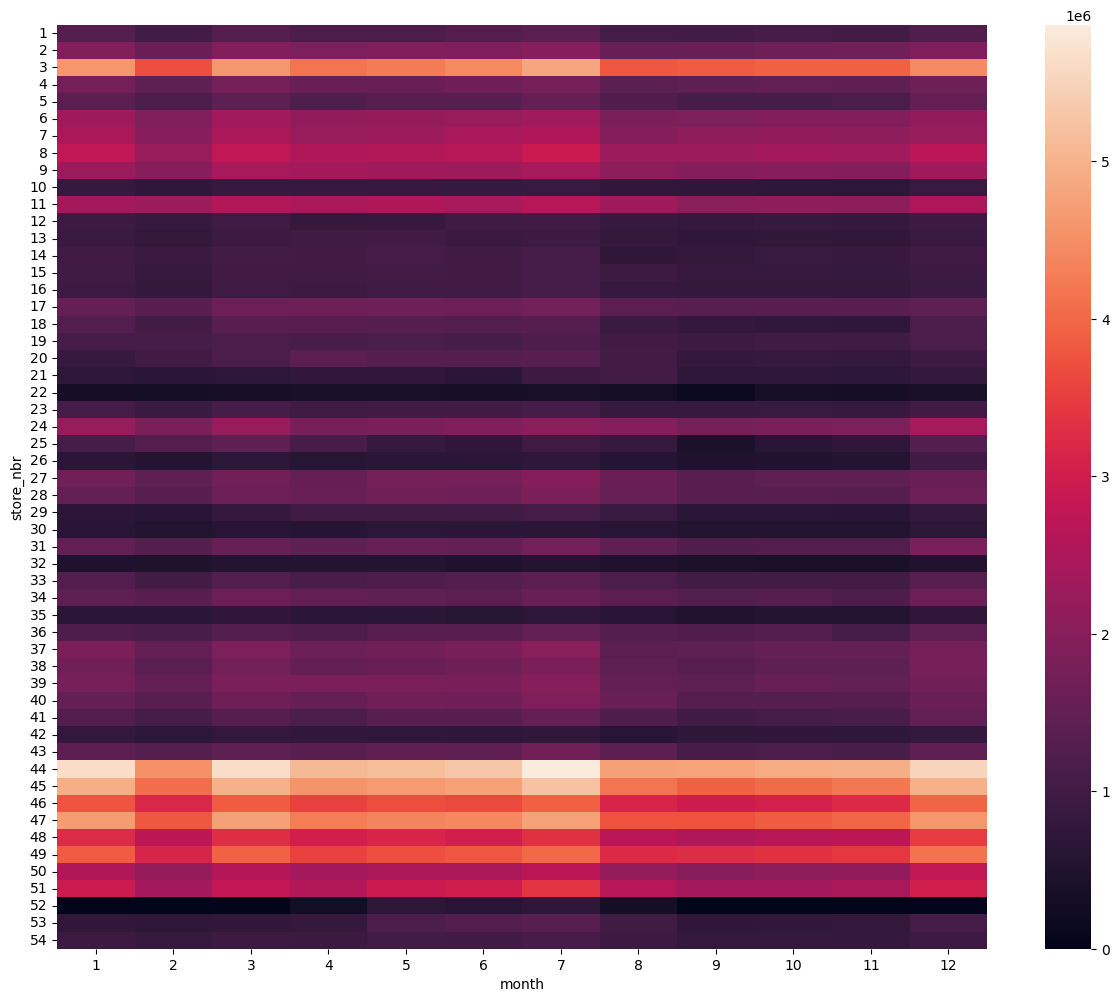

In [16]:
table1=pd.pivot_table(dataset,values='sales',index='store_nbr' ,columns= 'month',aggfunc=np.sum)
plt.figure(figsize=(15,12))
sns.heatmap(table1)
plt.show()

In [19]:
dataset['date']= dataset.index
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,0.000,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2013,2013-01-01
2013-01-01,1,0.000,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,1,2013,2013-01-01
2013-01-01,1,0.000,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,2013,2013-01-01
2013-01-01,1,0.000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,2013,2013-01-01
2013-01-01,1,0.000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,2013,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-15,9,438.133,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,8,15,2017,2017-08-15
2017-08-15,9,154.553,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,8,15,2017,2017-08-15
2017-08-15,9,2419.729,148,0,0,0,0,0,0,0,...,0,0,0,1,0,0,8,15,2017,2017-08-15


In [20]:
pd.merge(dataset, store, on='store_nbr', how= 'left')

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date,city,state,type,cluster
0,1,0.000,0,1,0,0,0,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
1,1,0.000,0,0,1,0,0,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
2,1,0.000,0,0,0,1,0,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
3,1,0.000,0,0,0,0,1,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
4,1,0.000,0,0,0,0,0,1,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,438.133,0,0,0,0,0,0,0,0,...,0,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6
3000884,9,154.553,1,0,0,0,0,0,0,0,...,0,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6
3000885,9,2419.729,148,0,0,0,0,0,0,0,...,0,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6
3000886,9,121.000,8,0,0,0,0,0,0,0,...,1,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6


In [21]:
dataset = pd.merge(dataset, store, on='store_nbr', how= 'left')

In [86]:
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,local_holiday,regional holiday,national holiday
0,1,0.000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
1,1,0.000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
2,1,0.000,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
3,1,0.000,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
4,1,0.000,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,2013,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,9,438.133,0,0,0,0,0,0,0,0,...,0,0,0,0,8,15,2017,0,0,0
3008276,9,154.553,1,0,0,0,0,0,0,0,...,1,0,0,0,8,15,2017,0,0,0
3008277,9,2419.729,148,0,0,0,0,0,0,0,...,0,1,0,0,8,15,2017,0,0,0
3008278,9,121.000,8,0,0,0,0,0,0,0,...,0,0,1,0,8,15,2017,0,0,0


In [23]:
holiday

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...
2017-12-22,Additional,National,Ecuador,Navidad-3,False
2017-12-23,Additional,National,Ecuador,Navidad-2,False
2017-12-24,Additional,National,Ecuador,Navidad-1,False


In [24]:
holiday.drop(holiday[holiday.transferred==True].index,axis=0, inplace=True)
holiday.drop('type', axis=1, inplace=True)

In [25]:
holiday_local = holiday[holiday.locale=='Local'].rename(columns={'locale_name':'city'})
holiday_local

,locale,city,description,transferred
date,,,,
2012-03-02,Local,Manta,Fundacion de Manta,False
2012-04-12,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Local,Riobamba,Cantonizacion de Riobamba,False
2012-05-12,Local,Puyo,Cantonizacion del Puyo,False
...,...,...,...,...
2017-11-12,Local,Ambato,Independencia de Ambato,False
2017-12-05,Local,Quito,Fundacion de Quito-1,False
2017-12-08,Local,Loja,Fundacion de Loja,False


In [26]:
holiday_region= holiday[holiday.locale=='Regional'].rename(columns={'locale_name':'state'})
holiday_region

,locale,state,description,transferred
date,,,,
2012-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-06-25,Regional,Imbabura,Provincializacion de Imbabura,False
2012-11-06,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
2012-11-07,Regional,Santa Elena,Provincializacion Santa Elena,False
2013-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2013-06-25,Regional,Imbabura,Provincializacion de Imbabura,False
2013-11-06,Regional,Santo Domingo de los Tsachilas,Provincializacion de Santo Domingo,False
2013-11-07,Regional,Santa Elena,Provincializacion Santa Elena,False
2014-04-01,Regional,Cotopaxi,Provincializacion de Cotopaxi,False


In [27]:
holiday_national= holiday[holiday.locale=='National']
holiday_national


,locale,locale_name,description,transferred
date,,,,
2012-08-10,National,Ecuador,Primer Grito de Independencia,False
2012-10-12,National,Ecuador,Traslado Independencia de Guayaquil,False
2012-11-02,National,Ecuador,Dia de Difuntos,False
2012-11-03,National,Ecuador,Independencia de Cuenca,False
2012-12-21,National,Ecuador,Navidad-4,False
...,...,...,...,...
2017-12-22,National,Ecuador,Navidad-3,False
2017-12-23,National,Ecuador,Navidad-2,False
2017-12-24,National,Ecuador,Navidad-1,False


In [28]:
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date,city,state,type,cluster
0,1,0.000,0,1,0,0,0,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
1,1,0.000,0,0,1,0,0,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
2,1,0.000,0,0,0,1,0,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
3,1,0.000,0,0,0,0,1,0,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
4,1,0.000,0,0,0,0,0,1,0,0,...,0,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,9,438.133,0,0,0,0,0,0,0,0,...,0,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6
3000884,9,154.553,1,0,0,0,0,0,0,0,...,0,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6
3000885,9,2419.729,148,0,0,0,0,0,0,0,...,0,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6
3000886,9,121.000,8,0,0,0,0,0,0,0,...,1,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6


In [29]:
dataset=pd.merge(dataset,holiday_local[[ 'city', 'transferred']],on=['date', 'city'], how='left' )
dataset['local_holiday']=dataset['transferred'].map(lambda x:1 if x==False  else 0)
dataset.drop(columns='transferred', inplace=True)
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_SEAFOOD,month,day,year,date,city,state,type,cluster,local_holiday
0,1,0.000,0,1,0,0,0,0,0,0,...,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13,0
1,1,0.000,0,0,1,0,0,0,0,0,...,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13,0
2,1,0.000,0,0,0,1,0,0,0,0,...,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13,0
3,1,0.000,0,0,0,0,1,0,0,0,...,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13,0
4,1,0.000,0,0,0,0,0,1,0,0,...,0,1,1,2013,2013-01-01,Quito,Pichincha,D,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001147,9,438.133,0,0,0,0,0,0,0,0,...,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6,0
3001148,9,154.553,1,0,0,0,0,0,0,0,...,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6,0
3001149,9,2419.729,148,0,0,0,0,0,0,0,...,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6,0
3001150,9,121.000,8,0,0,0,0,0,0,0,...,0,8,15,2017,2017-08-15,Quito,Pichincha,B,6,0


In [30]:
dataset= pd.merge(dataset, holiday_region, on =['date','state'], how='left')
dataset['regional holiday']= dataset.transferred.map(lambda x:1 if x== False else 0)
dataset.drop(columns='transferred', inplace=True)
dataset


,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,year,date,city,state,type,cluster,local_holiday,locale,description,regional holiday
0,1,0.000,0,1,0,0,0,0,0,0,...,2013,2013-01-01,Quito,Pichincha,D,13,0,NaN,NaN,0
1,1,0.000,0,0,1,0,0,0,0,0,...,2013,2013-01-01,Quito,Pichincha,D,13,0,NaN,NaN,0
2,1,0.000,0,0,0,1,0,0,0,0,...,2013,2013-01-01,Quito,Pichincha,D,13,0,NaN,NaN,0
3,1,0.000,0,0,0,0,1,0,0,0,...,2013,2013-01-01,Quito,Pichincha,D,13,0,NaN,NaN,0
4,1,0.000,0,0,0,0,0,1,0,0,...,2013,2013-01-01,Quito,Pichincha,D,13,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001147,9,438.133,0,0,0,0,0,0,0,0,...,2017,2017-08-15,Quito,Pichincha,B,6,0,NaN,NaN,0
3001148,9,154.553,1,0,0,0,0,0,0,0,...,2017,2017-08-15,Quito,Pichincha,B,6,0,NaN,NaN,0
3001149,9,2419.729,148,0,0,0,0,0,0,0,...,2017,2017-08-15,Quito,Pichincha,B,6,0,NaN,NaN,0
3001150,9,121.000,8,0,0,0,0,0,0,0,...,2017,2017-08-15,Quito,Pichincha,B,6,0,NaN,NaN,0


In [31]:
dataset = pd.merge(dataset, holiday_national, on=['date'], how='left')
dataset['national holiday']= dataset.transferred. map(lambda x:1 if x==False else 0)
dataset.drop(columns='transferred', inplace=True)
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,type,cluster,local_holiday,locale_x,description_x,regional holiday,locale_y,locale_name,description_y,national holiday
0,1,0.000,0,1,0,0,0,0,0,0,...,D,13,0,NaN,NaN,0,National,Ecuador,Primer dia del ano,1
1,1,0.000,0,0,1,0,0,0,0,0,...,D,13,0,NaN,NaN,0,National,Ecuador,Primer dia del ano,1
2,1,0.000,0,0,0,1,0,0,0,0,...,D,13,0,NaN,NaN,0,National,Ecuador,Primer dia del ano,1
3,1,0.000,0,0,0,0,1,0,0,0,...,D,13,0,NaN,NaN,0,National,Ecuador,Primer dia del ano,1
4,1,0.000,0,0,0,0,0,1,0,0,...,D,13,0,NaN,NaN,0,National,Ecuador,Primer dia del ano,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,9,438.133,0,0,0,0,0,0,0,0,...,B,6,0,NaN,NaN,0,NaN,NaN,NaN,0
3008276,9,154.553,1,0,0,0,0,0,0,0,...,B,6,0,NaN,NaN,0,NaN,NaN,NaN,0
3008277,9,2419.729,148,0,0,0,0,0,0,0,...,B,6,0,NaN,NaN,0,NaN,NaN,NaN,0
3008278,9,121.000,8,0,0,0,0,0,0,0,...,B,6,0,NaN,NaN,0,NaN,NaN,NaN,0


In [32]:
dataset.columns

Index(['store_nbr', 'sales', 'onpromotion', 'family_AUTOMOTIVE',
       'family_BABY CARE', 'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'month', 'day',
       'year', 'date', 'city', 'state', 'type', 'cluster', 'local_holiday',
       'locale_x', 'description_x', 'regional holiday', 'locale_y',
 

In [33]:
dataset.drop(columns=['date','city', 'state', 'type', 'cluster','locale_x', 'description_x', 'locale_y',
       'locale_name', 'description_y' ], inplace=True)
dataset

,store_nbr,sales,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,local_holiday,regional holiday,national holiday
0,1,0.000,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
1,1,0.000,0,0,1,0,0,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
2,1,0.000,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
3,1,0.000,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,2013,0,0,1
4,1,0.000,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,2013,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3008275,9,438.133,0,0,0,0,0,0,0,0,...,0,0,0,0,8,15,2017,0,0,0
3008276,9,154.553,1,0,0,0,0,0,0,0,...,1,0,0,0,8,15,2017,0,0,0
3008277,9,2419.729,148,0,0,0,0,0,0,0,...,0,1,0,0,8,15,2017,0,0,0
3008278,9,121.000,8,0,0,0,0,0,0,0,...,0,0,1,0,8,15,2017,0,0,0


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X= dataset.copy()
y= X.pop('sales')

In [46]:
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=89)

In [43]:
from xgboost import XGBRegressor

In [59]:
xgb= XGBRegressor(n_estimators =2000)

In [60]:
xgb.fit(X= x_train, y= y_train, eval_set= [(x_train, y_train),(x_test, y_test)],verbose= 50)

[0]	validation_0-rmse:905.41852	validation_1-rmse:911.94536
[50]	validation_0-rmse:395.21189	validation_1-rmse:407.99259
[100]	validation_0-rmse:371.33458	validation_1-rmse:386.51624
[150]	validation_0-rmse:357.03442	validation_1-rmse:376.39290
[200]	validation_0-rmse:345.28317	validation_1-rmse:368.80332
[250]	validation_0-rmse:336.08646	validation_1-rmse:364.25916
[300]	validation_0-rmse:329.77467	validation_1-rmse:359.47757
[350]	validation_0-rmse:321.74824	validation_1-rmse:355.07950
[400]	validation_0-rmse:317.74070	validation_1-rmse:353.34831
[450]	validation_0-rmse:312.31405	validation_1-rmse:352.27404
[500]	validation_0-rmse:307.22146	validation_1-rmse:349.39079
[550]	validation_0-rmse:302.73393	validation_1-rmse:346.83658
[600]	validation_0-rmse:299.28362	validation_1-rmse:345.61447
[650]	validation_0-rmse:295.70845	validation_1-rmse:343.30107
[700]	validation_0-rmse:292.63235	validation_1-rmse:342.23217
[750]	validation_0-rmse:289.74703	validation_1-rmse:340.49393
[800]	valid

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=2000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [78]:
pd.DataFrame(xgb.feature_importances_, index= xgb.feature_names_in_).sort_values(by=0, ascending=True)

,0
regional holiday,0.000081
family_PLAYERS AND ELECTRONICS,0.000287
family_GROCERY II,0.000497
family_MAGAZINES,0.000506
family_PET SUPPLIES,0.000648
family_HOME APPLIANCES,0.000736
family_HARDWARE,0.000849
family_BOOKS,0.000868
family_LINGERIE,0.000876
family_LADIESWEAR,0.000914


In [62]:
prediction = xgb.predict(x_test)

In [53]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [63]:
r2_score(y_test, prediction)

0.9147745096750606

In [64]:
mean_squared_error(y_test, prediction)

104610.1286256229

In [65]:
mean_absolute_error(y_test, prediction)

87.6637126167651

In [74]:
y_train.shape

(2406624,)

In [83]:
def mean_abs_err_percentage (y_true, y_pred):
    """ Calculate MAPE from true and predicted values"""
    y_true, y_pred= np.array(y_true),np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [84]:
mean_abs_err_percentage(y_test, prediction)

C:\Users\HD STORE\AppData\Local\Temp\ipykernel_12108\1242899145.py:4: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true-y_pred)/y_true))*100


inf

In [58]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [72]:
early_stopping= EarlyStopping(min_delta=0.001, patience=100)

In [69]:
model = Sequential(layers=[
    Dense(units=256,input_dim=41 ,activation='relu', name= 'hidden_1'),
        Dense(units=128, activation='relu', name= 'hidden_2'),
        Dense(units=64, activation='relu', name= 'hidden_3'),
        Dense(units=1, activation='linear', name= 'output'),
])
model.compile(optimizer='adam', loss='mse')

In [75]:
history=model.fit(x=x_train, y=y_train, epochs=1000, batch_size= 256,verbose= 100,validation_data=(x_test, y_test), 
                  callbacks=[early_stopping]  )

Epoch 1/1000
Epoch 2/1000
Epoch 3/1000
Epoch 4/1000
Epoch 5/1000
Epoch 6/1000
Epoch 7/1000
Epoch 8/1000
Epoch 9/1000
Epoch 10/1000
Epoch 11/1000
Epoch 12/1000
Epoch 13/1000
Epoch 14/1000
Epoch 15/1000
Epoch 16/1000
Epoch 17/1000
Epoch 18/1000
Epoch 19/1000
Epoch 20/1000
Epoch 21/1000
Epoch 22/1000
Epoch 23/1000
Epoch 24/1000
Epoch 25/1000
Epoch 26/1000
Epoch 27/1000
Epoch 28/1000
Epoch 29/1000
Epoch 30/1000
Epoch 31/1000
Epoch 32/1000
Epoch 33/1000
Epoch 34/1000
Epoch 35/1000
Epoch 36/1000
Epoch 37/1000
Epoch 38/1000
Epoch 39/1000
Epoch 40/1000
Epoch 41/1000
Epoch 42/1000
Epoch 43/1000
Epoch 44/1000
Epoch 45/1000
Epoch 46/1000
Epoch 47/1000
Epoch 48/1000
Epoch 49/1000
Epoch 50/1000
Epoch 51/1000
Epoch 52/1000
Epoch 53/1000
Epoch 54/1000
Epoch 55/1000
Epoch 56/1000
Epoch 57/1000
Epoch 58/1000
Epoch 59/1000
Epoch 60/1000
Epoch 61/1000
Epoch 62/1000
Epoch 63/1000
Epoch 64/1000
Epoch 65/1000
Epoch 66/1000
Epoch 67/1000
Epoch 68/1000
Epoch 69/1000
Epoch 70/1000
Epoch 71/1000
Epoch 72/1000
E

In [76]:
history.history

{'loss': [487836.40625,
  411442.28125,
  377875.78125,
  365908.25,
  356213.4375,
  352997.28125,
  347198.03125,
  342192.21875,
  346816.875,
  341511.3125,
  337033.875,
  334610.71875,
  330387.125,
  327349.0,
  324816.59375,
  323817.09375,
  318970.09375,
  318305.5625,
  315779.78125,
  316736.625,
  313645.90625,
  309753.53125,
  306045.34375,
  313714.78125,
  323256.5,
  310471.90625,
  308985.3125,
  312031.875,
  310959.59375,
  309008.96875,
  304558.78125,
  303671.53125,
  303173.71875,
  302306.15625,
  301858.09375,
  299801.96875,
  298620.4375,
  299733.1875,
  297462.0,
  294824.0,
  292989.125,
  293863.4375,
  293040.71875,
  289862.53125,
  292584.625,
  291045.4375,
  290659.84375,
  287943.09375,
  287604.4375,
  285298.65625,
  285537.625,
  290184.09375,
  283122.40625,
  284915.6875,
  280294.875,
  284562.5,
  284881.5,
  280186.0,
  279617.0625,
  280972.0,
  282610.71875,
  280065.40625,
  277173.4375,
  277315.34375,
  276793.125,
  276239.8125,
  27

In [77]:
np.sqrt(257916)

507.85430981729394

# using kares is not the best way lets calc by xgboost for test then submit 

In [115]:
test_dataset=pd.read_csv('./test.csv', index_col='date', parse_dates=True).drop(columns=['id'])
test_dataset=pd.get_dummies(test_dataset,columns=['family'] )
test_dataset['month']= test_dataset.index.month
test_dataset['day']= test_dataset.index.day
test_dataset['year']= test_dataset.index.year
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PET SUPPLIES,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,16,2017
2017-08-16,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,16,2017
2017-08-16,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,8,16,2017
2017-08-16,1,20,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,8,16,2017
2017-08-16,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,8,16,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,9,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,8,31,2017
2017-08-31,9,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,8,31,2017
2017-08-31,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,8,31,2017


In [116]:
test_dataset['date']= test_dataset.index
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PLAYERS AND ELECTRONICS,family_POULTRY,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date
date,,,,,,,,,,,,,,,,,,,,,
2017-08-16,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,8,16,2017,2017-08-16
2017-08-16,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,8,16,2017,2017-08-16
2017-08-16,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,8,16,2017,2017-08-16
2017-08-16,1,20,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,8,16,2017,2017-08-16
2017-08-16,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,8,16,2017,2017-08-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-31,9,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,8,31,2017,2017-08-31
2017-08-31,9,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,8,31,2017,2017-08-31
2017-08-31,9,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,8,31,2017,2017-08-31


In [117]:
test_dataset = pd.merge(test_dataset, store[['city', 'state']], on=['store_nbr'], how='left')
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date,city,state
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha
2,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha
3,1,20,0,0,0,1,0,0,0,0,...,0,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,8,31,2017,2017-08-31,Quito,Pichincha
28508,9,0,0,0,0,0,0,0,0,0,...,1,0,0,0,8,31,2017,2017-08-31,Quito,Pichincha
28509,9,1,0,0,0,0,0,0,0,0,...,0,1,0,0,8,31,2017,2017-08-31,Quito,Pichincha
28510,9,9,0,0,0,0,0,0,0,0,...,0,0,1,0,8,31,2017,2017-08-31,Quito,Pichincha


In [118]:
test_dataset= pd.merge(test_dataset, holiday_local[[ 'city', 'transferred']], on=['city', 'date'] ,how= 'left')
test_dataset['local_holiday']= test_dataset.transferred.map(lambda x:1 if x == False else 0)
test_dataset.drop(columns=['transferred'], inplace=True)
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date,city,state,local_holiday
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0
2,1,2,0,0,1,0,0,0,0,0,...,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0
3,1,20,0,0,0,1,0,0,0,0,...,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,1,0,0,0,0,0,0,0,0,...,0,0,0,8,31,2017,2017-08-31,Quito,Pichincha,0
28508,9,0,0,0,0,0,0,0,0,0,...,0,0,0,8,31,2017,2017-08-31,Quito,Pichincha,0
28509,9,1,0,0,0,0,0,0,0,0,...,1,0,0,8,31,2017,2017-08-31,Quito,Pichincha,0
28510,9,9,0,0,0,0,0,0,0,0,...,0,1,0,8,31,2017,2017-08-31,Quito,Pichincha,0


In [119]:
test_dataset= pd.merge(test_dataset, holiday_region[[ 'state', 'transferred']], on=['state', 'date'] ,how= 'left')
test_dataset['regional holiday']= test_dataset.transferred.map(lambda x:1 if x == False else 0)
test_dataset.drop(columns=['transferred'], inplace=True)
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,date,city,state,local_holiday,regional holiday
0,1,0,1,0,0,0,0,0,0,0,...,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0,0
2,1,2,0,0,1,0,0,0,0,0,...,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0,0
3,1,20,0,0,0,1,0,0,0,0,...,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,8,16,2017,2017-08-16,Quito,Pichincha,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,1,0,0,0,0,0,0,0,0,...,0,0,8,31,2017,2017-08-31,Quito,Pichincha,0,0
28508,9,0,0,0,0,0,0,0,0,0,...,0,0,8,31,2017,2017-08-31,Quito,Pichincha,0,0
28509,9,1,0,0,0,0,0,0,0,0,...,0,0,8,31,2017,2017-08-31,Quito,Pichincha,0,0
28510,9,9,0,0,0,0,0,0,0,0,...,1,0,8,31,2017,2017-08-31,Quito,Pichincha,0,0


In [120]:
test_dataset = pd.merge(test_dataset, holiday_national, on=['date'], how='left')
test_dataset['national holiday']= test_dataset.transferred. map(lambda x:1 if x==False else 0)
test_dataset.drop(columns='transferred', inplace=True)
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,year,date,city,state,local_holiday,regional holiday,locale,locale_name,description,national holiday
0,1,0,1,0,0,0,0,0,0,0,...,2017,2017-08-16,Quito,Pichincha,0,0,NaN,NaN,NaN,0
1,1,0,0,1,0,0,0,0,0,0,...,2017,2017-08-16,Quito,Pichincha,0,0,NaN,NaN,NaN,0
2,1,2,0,0,1,0,0,0,0,0,...,2017,2017-08-16,Quito,Pichincha,0,0,NaN,NaN,NaN,0
3,1,20,0,0,0,1,0,0,0,0,...,2017,2017-08-16,Quito,Pichincha,0,0,NaN,NaN,NaN,0
4,1,0,0,0,0,0,1,0,0,0,...,2017,2017-08-16,Quito,Pichincha,0,0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,1,0,0,0,0,0,0,0,0,...,2017,2017-08-31,Quito,Pichincha,0,0,NaN,NaN,NaN,0
28508,9,0,0,0,0,0,0,0,0,0,...,2017,2017-08-31,Quito,Pichincha,0,0,NaN,NaN,NaN,0
28509,9,1,0,0,0,0,0,0,0,0,...,2017,2017-08-31,Quito,Pichincha,0,0,NaN,NaN,NaN,0
28510,9,9,0,0,0,0,0,0,0,0,...,2017,2017-08-31,Quito,Pichincha,0,0,NaN,NaN,NaN,0


In [124]:
test_dataset.columns

Index(['store_nbr', 'onpromotion', 'family_AUTOMOTIVE', 'family_BABY CARE',
       'family_BEAUTY', 'family_BEVERAGES', 'family_BOOKS',
       'family_BREAD/BAKERY', 'family_CELEBRATION', 'family_CLEANING',
       'family_DAIRY', 'family_DELI', 'family_EGGS', 'family_FROZEN FOODS',
       'family_GROCERY I', 'family_GROCERY II', 'family_HARDWARE',
       'family_HOME AND KITCHEN I', 'family_HOME AND KITCHEN II',
       'family_HOME APPLIANCES', 'family_HOME CARE', 'family_LADIESWEAR',
       'family_LAWN AND GARDEN', 'family_LINGERIE', 'family_LIQUOR,WINE,BEER',
       'family_MAGAZINES', 'family_MEATS', 'family_PERSONAL CARE',
       'family_PET SUPPLIES', 'family_PLAYERS AND ELECTRONICS',
       'family_POULTRY', 'family_PREPARED FOODS', 'family_PRODUCE',
       'family_SCHOOL AND OFFICE SUPPLIES', 'family_SEAFOOD', 'month', 'day',
       'year', 'local_holiday', 'regional holiday', 'national holiday'],
      dtype='object')

In [125]:
test_dataset.drop(columns=['date', 'city','state','locale', 'locale_name','description' ], inplace=True)

KeyError: "['date', 'city', 'state', 'locale', 'locale_name', 'description'] not found in axis"

In [126]:
test_dataset

,store_nbr,onpromotion,family_AUTOMOTIVE,family_BABY CARE,family_BEAUTY,family_BEVERAGES,family_BOOKS,family_BREAD/BAKERY,family_CELEBRATION,family_CLEANING,...,family_PREPARED FOODS,family_PRODUCE,family_SCHOOL AND OFFICE SUPPLIES,family_SEAFOOD,month,day,year,local_holiday,regional holiday,national holiday
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,8,16,2017,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,8,16,2017,0,0,0
2,1,2,0,0,1,0,0,0,0,0,...,0,0,0,0,8,16,2017,0,0,0
3,1,20,0,0,0,1,0,0,0,0,...,0,0,0,0,8,16,2017,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,8,16,2017,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,9,1,0,0,0,0,0,0,0,0,...,0,0,0,0,8,31,2017,0,0,0
28508,9,0,0,0,0,0,0,0,0,0,...,1,0,0,0,8,31,2017,0,0,0
28509,9,1,0,0,0,0,0,0,0,0,...,0,1,0,0,8,31,2017,0,0,0
28510,9,9,0,0,0,0,0,0,0,0,...,0,0,1,0,8,31,2017,0,0,0


In [127]:
xgb.predict(test_dataset)

array([ -11.2260685,  -19.02198  ,   13.45409  , ..., 1449.5244   ,
        -62.272625 ,  -37.945896 ], dtype=float32)

In [134]:
submission= pd.read_csv('./sample_submission.csv')
submission['sales']= xgb.predict(test_dataset)
submission['sales']= submission['sales'].map(lambda x:x if x>0 else 0)

In [137]:
submission.to_csv('./submission.csv', index=False)